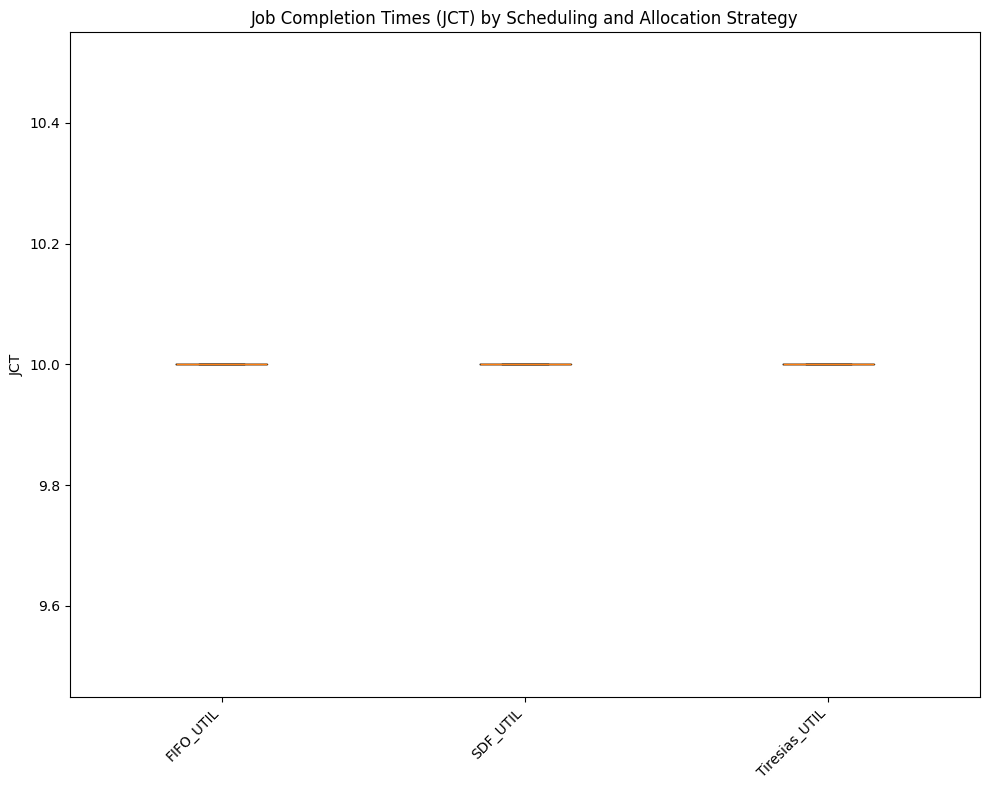

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your settings
scheduling = ['FIFO', 'SDF', 'Tiresias']
# scheduling = ['FIFO', 'SDF']
allocation = ['SGF', 'LGF', 'UTIL']
number = '4'
pth = '/home/andrea/projects/Plebiscitotest/'

# Prepare to collect all JCT data
data = {}
for sched in scheduling:
    for alloc in allocation:
        # Construct the file name
        file_name = f"{number}jobs_{sched}_{alloc}.csv"
        full_path = f"{pth}{file_name}"

        # Load the CSV file
        try:
            df = pd.read_csv(full_path)

            # Assume 'jct' is the column for Job Completion Time
            if 'jct' in df.columns:
                data[f"{sched}_{alloc}"] = df['jct']
            else:
                print(f"Column 'jct' not found in {file_name}")
        except FileNotFoundError:
            print(f"File not found: {file_name}")
        except Exception as e:
            print(f"An error occurred with {file_name}: {str(e)}")

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
# Exclude outliers in the boxplot
ax.boxplot(data.values(), labels=data.keys(), showfliers=False)
ax.set_title('Job Completion Times (JCT) by Scheduling and Allocation Strategy')
ax.set_ylabel('JCT')
ax.set_xticklabels(data.keys(), rotation=45, ha='right')
plt.tight_layout()
plt.show()
